# RCC Specific Cohort Characteristics 

Author: Olatomiwa Bifarin<br>
Department of Biochemistry and Molecular Biology<br>
University of Georgia<br>
Edison Lab<br>

Last edited: 17JAN2020 

_This is a static version of a Jupyter notebook, and work (documentation) is still in progress_ 
 
### Notebook Outline

1. [Background](#1)
2. [Functions](#2)
3. [Load Data](#3)
4. [Missing RCC Data](#4)
5. [RCC Meta-Data Plots](#5)


In [2]:
#import python packages and libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style

#For Seaborn plots
import seaborn as sns; sns.set(style='white')

#To ignore warning
import warnings
warnings.filterwarnings('ignore')

# More sharp and legible graphics
%config InlineBackend.figure_format = 'retina'

# Set seaborn figure labels to 'talk', to be more visible. 
sns.set_context('talk')

## 1. Background
<a id="1"></a>

In this notebook, meta-data distinct to RCC will be analyzed. This include: 
    - Metastasis
    - Histological Subtypes
    - Nuclear Grade
    - TNM Staging
    - Stage of RCC
    - Tumor Width

## 2. Functions
<a id="2"></a>

___Piechart function___

In [3]:
def pieChart(dataframe, tilt_num, explode=False, shadow=False): 
    '''
    DEPENDENCY: matplotlib.pyplot.pie
    
    INPUTS: 
    dataframe = A pandas dataframe with category in the first column and associated data in the second column
    tilt_num = A number that specifies the amount of offset to apply to the wedge corresponding to the dataset 
    on the last row. The purpose of this is to make pie-chart annotation visible in the case of an overlapping 
    annotation. For best results, choose number between 0 and 1.  
    
    explode = Boolean. Set to True to make the tilt_num parameters applicable. 
    
    shadow = Boolean. Set to True for wedge shadows
    
    OUTPUTS: A pie chart figure. 
    
    '''
    if explode==False: 
        plt.pie(
        # using data
        dataframe.iloc[:, 1],
        # labels
        labels=dataframe.iloc[:, 0],
        # with no shadows
        shadow=shadow,
        # with the start angle at 90%
        startangle=90,
        # with the percent listed as a fraction
        autopct='%1.1f%%')
    
        # View the plot drop above
        plt.axis('equal')
        # View the plot
        plt.tight_layout()
        fig = plt.plot()
        return fig
    else:
        lst = [0] * dataframe.shape[0] # create a list of length equal to number of pie, sets to zero
        lst[-1] = tilt_num # replace the last digit of lst with the tilt_num
        plt.pie(dataframe.iloc[:, 1], labels=dataframe.iloc[:, 0],
        shadow=shadow, explode=lst, startangle=90, autopct='%1.1f%%')
    
        # View the plot drop above
        plt.axis('equal')
        # View the plot
        plt.tight_layout()
        fig = plt.plot()
    return fig

## 3. Load Data
<a id="3"></a>

In [24]:
dfmodel = pd.read_excel('data/modelcohort.xlsx')

In [25]:
dfmodel.head()

,Patient ID,Sample ID,1,2,3,4,5,6,7,8,...,unk2,unk3,unk4,unk5,unk6,unk7,unk8,unk9,unk10,unk11
0,PD097,C044,5.525241e+08,1.497691e+09,1.492827e+09,11593.957849,250106.904802,1472.117629,1.349267e+05,342421.151401,...,0.012593,0.105046,0.093999,0.156028,0.066411,0.263757,0.006185,0.003682,0.006753,0.000540
1,PD048,C021,1.049244e+06,1.147988e+09,1.126821e+09,25461.056080,180547.339603,12970.004442,1.733684e+05,500480.171648,...,0.007301,2.469491,0.157591,0.265723,0.075258,0.652888,0.003558,0.004066,0.040991,0.001649
2,PD059,C026,1.544867e+06,1.012672e+09,9.867161e+08,3357.299224,14635.444322,9918.328312,3.726460e+04,121365.189016,...,0.006224,0.198874,0.176234,0.608468,0.076273,0.206792,0.006712,0.003237,0.014225,0.000440
3,PD120,C061,4.050596e+08,1.360247e+09,6.470647e+06,11160.005706,16164.306798,1373.003603,8.488755e+05,565565.885445,...,0.010469,0.118245,0.183832,0.433292,0.070774,0.280034,0.006880,0.003478,0.016467,0.000774
4,PD068,C028,7.052816e+08,1.435336e+09,6.763829e+06,4836.529846,73052.813054,1375.766035,1.811282e+06,374378.776113,...,0.010026,0.097577,0.075268,0.180175,0.223620,0.366165,0.006056,0.003129,0.004920,0.001123


In [26]:
dfRCC = pd.read_excel('data/RCC_MetaData_01JUL2019.xlsx')
dfRCC.head()

,Patient ID,Encounter,Gender,Race,Height,Weight,BMI,Smoker,Age,Metastatic,...,unk2,unk3,unk4,unk5,unk6,unk7,unk8,unk9,unk10,unk11
0,PD001,ambulatory,Male,White,67.01,155.32,24.4,Never,38.1,No,...,0.004880,0.117647,0.147420,0.543905,0.054397,0.319233,0.007420,0.003132,0.001784,0.001298
1,PD002,surgery,Female,Black/AA,65.98,142.34,23.0,Never,54.5,No,...,0.009134,0.105870,0.080319,0.171181,0.083618,0.315460,0.008563,0.011618,0.006069,0.000710
2,PD003,surgery,Male,White,72.00,225.00,30.6,Never,64.9,No,...,0.012424,0.285972,0.102257,0.080530,0.065652,0.160480,0.007992,0.003616,0.002637,0.000639
3,PD005,ambulatory,Male,White,70.98,244.42,34.2,Never,64.0,No,...,0.008217,0.129223,0.106857,0.254843,0.060091,0.539889,0.005810,0.003354,0.001337,0.001725
4,PD006,ambulatory,Male,Black/AA,72.01,246.00,33.5,Former,73.4,No,...,0.010618,0.119070,0.105318,0.171751,0.095694,0.401531,0.008109,0.002233,0.005331,0.001421


In [27]:
dfRCC = dfRCC.filter(['Patient ID', 'Metastatic', 'SubTypes', 
                      'Nuclear Grade', 'Grade', 'Tstage', 
                      'Tstage Group', 'Nstage', 'Mstage', 
                      'Stage', 'Grouped Stage','Tumor Width'], axis=1)

In [28]:
RCCdataframe = pd.merge(dfmodel, dfRCC, on='Patient ID') # Merge the two dataframe on Sample ID
RCCdataframe.shape

(31, 7156)

## 4. Missing Data
<a id="4"></a>

In [29]:
RCCmetadata = RCCdataframe.filter(['Sample_ID', 'Collection', 'Gender', 'Race', 'Height', 'Weight', 'BMI',
       'Smoker', 'Age', 'Metastatic', 'SubTypes', 'Nuclear Grade', 'Tstage',
       'Nstage', 'Mstage', 'Stage', 'Tumor Width', 'Groups', '3Groups'])
print(RCCmetadata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 15 columns):
Collection       31 non-null object
Gender           31 non-null object
Race             31 non-null object
BMI              31 non-null float64
Smoker           31 non-null object
Age              31 non-null float64
Metastatic       31 non-null object
SubTypes         31 non-null object
Nuclear Grade    30 non-null float64
Tstage           31 non-null object
Nstage           31 non-null object
Mstage           31 non-null object
Stage            29 non-null float64
Tumor Width      31 non-null float64
Groups           31 non-null object
dtypes: float64(5), object(10)
memory usage: 3.9+ KB
None


In [30]:
print ('Number of missing values in metastatic is', 
       RCCdataframe['Metastatic'].isna().sum())
print ('Number of missing values in subtypes is', 
       RCCdataframe['SubTypes'].isna().sum())
print ('Number of missing values in nuclear grade is', 
       RCCdataframe['Nuclear Grade'].isna().sum())
print ('Number of missing values in T stage is', 
       RCCdataframe['Tstage'].isna().sum())
print ('Number of missing values in N stage is', 
       RCCdataframe['Nstage'].isna().sum())
print ('Number of missing values in M stage is', 
       RCCdataframe['Mstage'].isna().sum())
print ('Number of missing values in stage is', 
       RCCdataframe['Stage'].isna().sum())

Number of missing values in metastatic is 0
Number of missing values in subtypes is 0
Number of missing values in nuclear grade is 1
Number of missing values in T stage is 0
Number of missing values in N stage is 0
Number of missing values in M stage is 0
Number of missing values in stage is 2


_Cancer Stage_: Two individuals cancer stage are not reported due inconclusive TNM staging. 

**How Stages were determined**

https://emedicine.medscape.com/article/2006851-overview

Define features for RCC, numerical. 

In [32]:
df_features = RCCdataframe.drop(
    ['Groups', 'Collection', 'Patient ID', 'Metastatic', 
     'SubTypes','Nuclear Grade', 'Grade', 'Tstage', 
     'Tstage Group', 'Nstage', 'Mstage', 
     'Stage', 'Grouped Stage','Tumor Width','Gender', 
     'Race', 'BMI', 'Smoker', 'Age' ], axis=1)

## 5. RCC Meta-Data
<a id="5"></a>

- Collection Method 
- Metastatic RCC At The Time of Collection 
- Histological subtypes 
- Nuclear grades 
- TNM staging 
- Kidney cancer stage

***a. Collection Method***

Surgery: Urine collected at the time of surgery;
Ambulatory: Urine collected while the patient was ambulatory

In [33]:
RCCmetadata['Collection'].value_counts()

Clinic    31
Name: Collection, dtype: int64

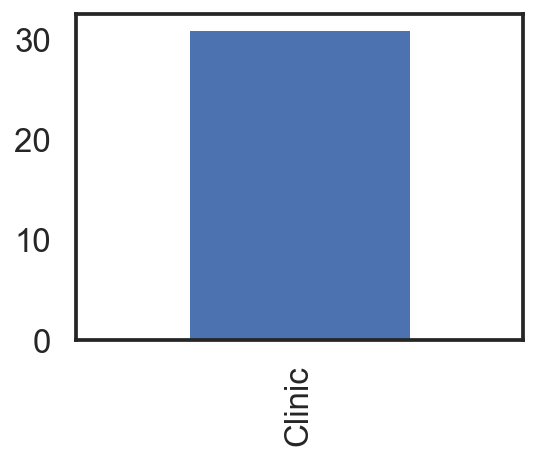

In [34]:
pd.value_counts(RCCmetadata['Collection']).plot.bar(figsize=(4,3));

***b. Metastasis***

In [35]:
RCCmetadata['Metastatic'].value_counts()

No     24
Yes     7
Name: Metastatic, dtype: int64

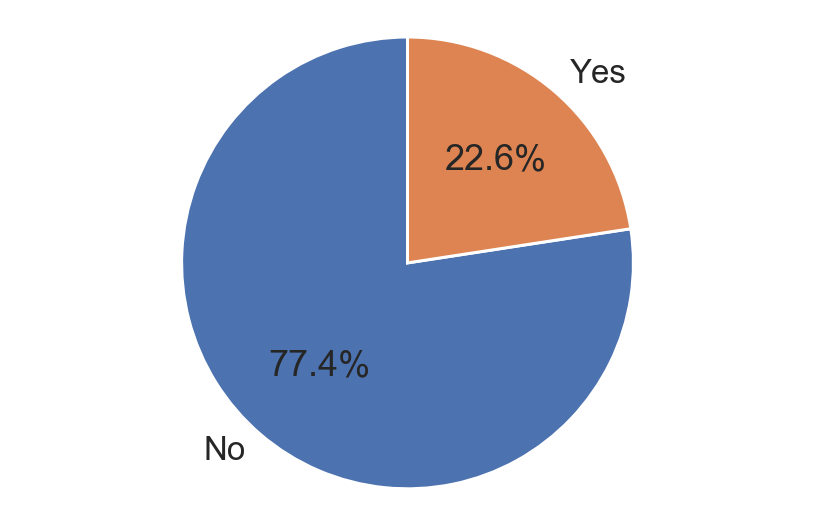

In [62]:
sns.set_context('talk', font_scale=1.0)
raw_data = {'Metastatic': ['No', 'Yes'],
        'Numbers': [24, 7]}
data = pd.DataFrame(raw_data)
pieChart(data, 0.2, explode=False, shadow = False);
#plt.savefig('modelcohort_metastasis.svg') 

***c. Histological Subtypes***

In [40]:
RCCmetadata['SubTypes'].value_counts()

Pure Clear Cell         22
Papillary                3
Chromophobe              2
Clear Cell Papillary     2
Unclassified             2
Name: SubTypes, dtype: int64

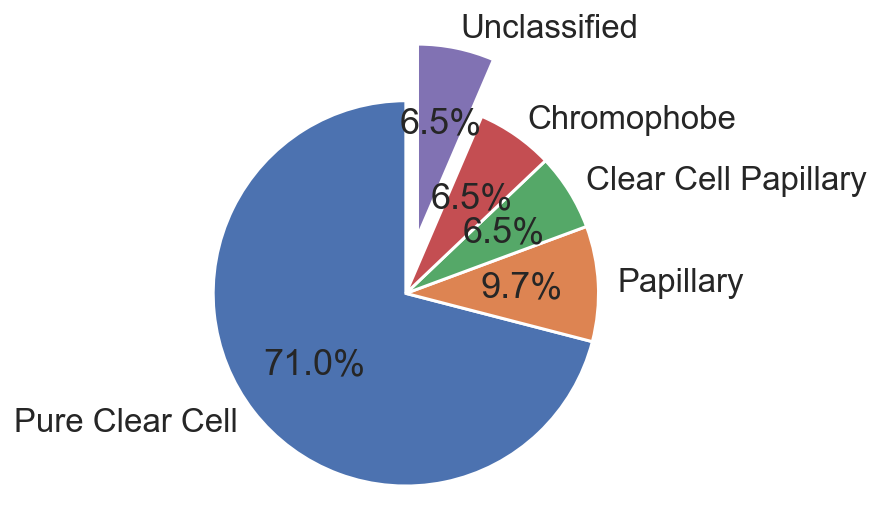

In [63]:
raw_data = {'Subtypes': ['Pure Clear Cell','Papillary', 'Clear Cell Papillary',
                         'Chromophobe', 'Unclassified'], 'Numbers': [22, 3, 2, 2, 2]}
data = pd.DataFrame(raw_data)
pieChart(data, 0.3, explode=True, shadow = False);
#plt.savefig('modelcohort_subtypes.svg') 

***d. Nuclear Grade***

In [50]:
RCCmetadata['Nuclear Grade'].value_counts()

4.0    12
2.0    10
3.0     8
Name: Nuclear Grade, dtype: int64

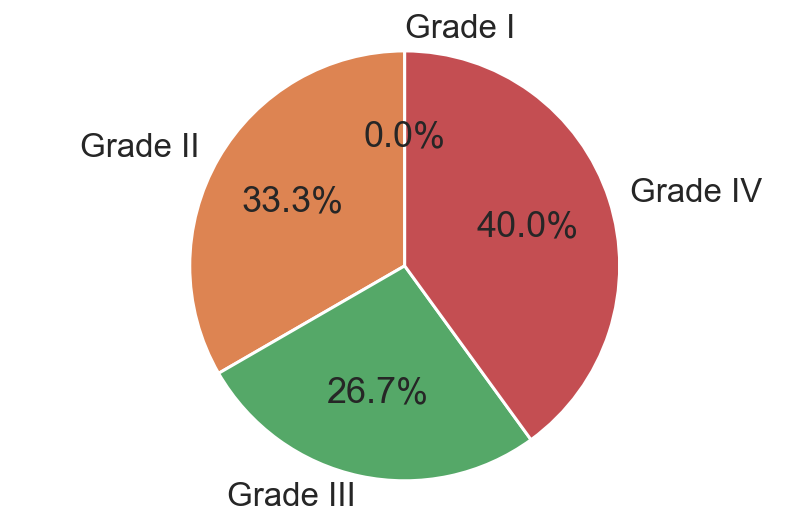

In [66]:
raw_data = {'Nuclear Grade': ['Grade I', 'Grade II', 'Grade III', 'Grade IV'], 
            'Numbers': [0, 10, 8, 12]}
data = pd.DataFrame(raw_data)
pieChart(data, 0.2, explode=False, shadow = False);
#plt.savefig('modelcohort_nucleargrade.svg') 

***e. TNM Stages***

In [54]:
RCCdataframe['Tstage'].value_counts()

T3a    11
T1a    11
T1b     5
T2a     2
T4      1
T2b     1
Name: Tstage, dtype: int64

In [55]:
RCCdataframe['Mstage'].value_counts()

M0    24
M1     7
Name: Mstage, dtype: int64

In [56]:
RCCdataframe['Nstage'].value_counts()

N0    25
N1     4
NX     2
Name: Nstage, dtype: int64

***d. Kidney Cancer Stages***

In [57]:
RCCdataframe['Stage'].value_counts()

1.0    13
4.0     7
3.0     6
2.0     3
Name: Stage, dtype: int64

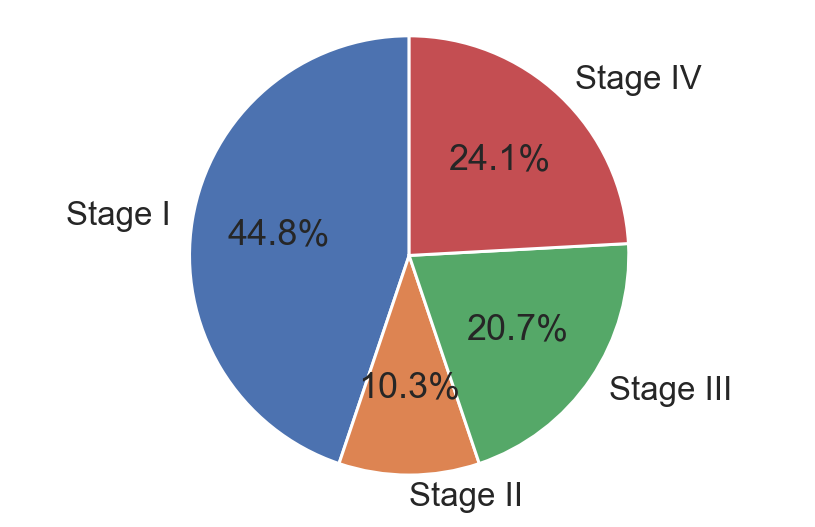

In [65]:
raw_data = {'Nuclear Grade': ['Stage I', 'Stage II', 'Stage III', 'Stage IV'], 
            'Numbers': [13, 3, 6, 7]}
data = pd.DataFrame(raw_data)
pieChart(data, 0.20, explode=False, shadow =False);
#plt.savefig('modelcohort_stages.svg') 

***e. Tumor Width***

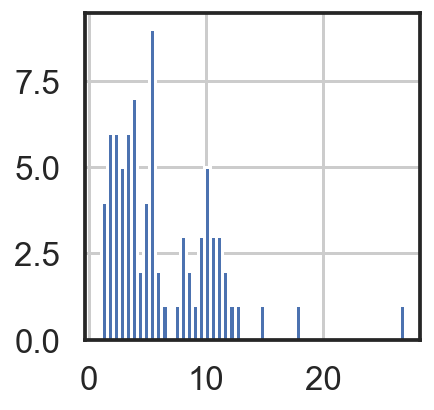

In [33]:
RCCdataframe['Tumor Width'].hist(figsize=(3, 3), bins=50);